In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [2]:
vowels = 'a e i o u y sz z ź ż g r'.split()
data = np.genfromtxt('145325-clustersel.txt', delimiter='\t')
print(data.shape)
X = data[:,:-1]
print(X.shape)
y = data[:,-1].astype(int)
print(y.shape)
labels = [vowels[nr%100]+str(nr//100) for nr in y]  # ['a1', 'e1', 'i1', .., 'r1', 'a2', 'e2', ..]

(48, 128)
(48, 127)
(48,)


[0.52102403 0.23351236]


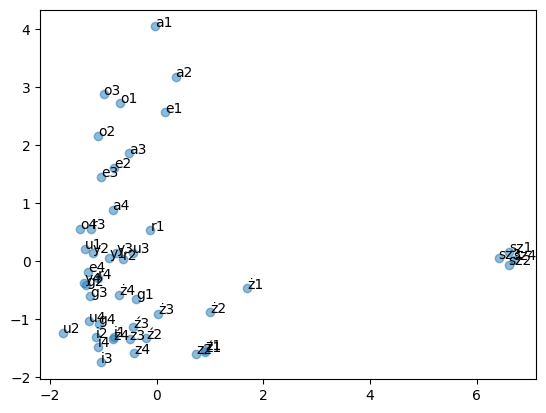

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
for i,pair in enumerate(X_pca):
    plt.text(pair[0], pair[1], labels[i])

plt.savefig('pca_zadanie_3.png')

[0.52102403 0.23351236]


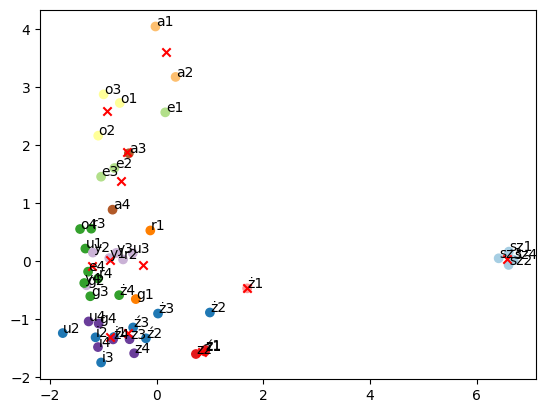

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

for i, label in enumerate(labels):
    plt.annotate(label, X_pca[i] + 0.01)

k_means = KMeans(init='k-means++', n_clusters=12, n_init=10)
k_means.fit(X)
centroids = pca.transform(k_means.cluster_centers_)

plt.scatter(*X_pca.T, c=k_means.predict(X), cmap='Paired')
plt.scatter(*centroids.T, marker='x', color='red')
plt.savefig('k_means_wykres_zadanie_5.png')

[0.83941223 0.03785   ]


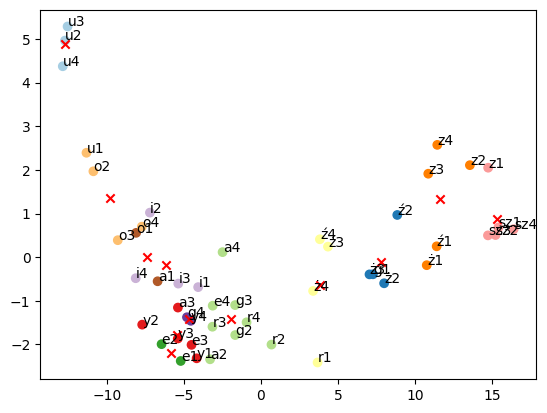

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.log10(X))
print(pca.explained_variance_ratio_)

for i, label in enumerate(labels):
    plt.annotate(label, X_pca[i] + 0.01)

k_means = KMeans(init='k-means++', n_clusters=12, n_init=10)
k_means.fit(np.log10(X))
centroids = pca.transform(k_means.cluster_centers_)

plt.scatter(*X_pca.T, c=k_means.predict(np.log10(X)), cmap='Paired')
plt.scatter(*centroids.T, marker='x', color='red')
plt.savefig('k_means_wykres_logarytmiczny_zadanie_5.png')

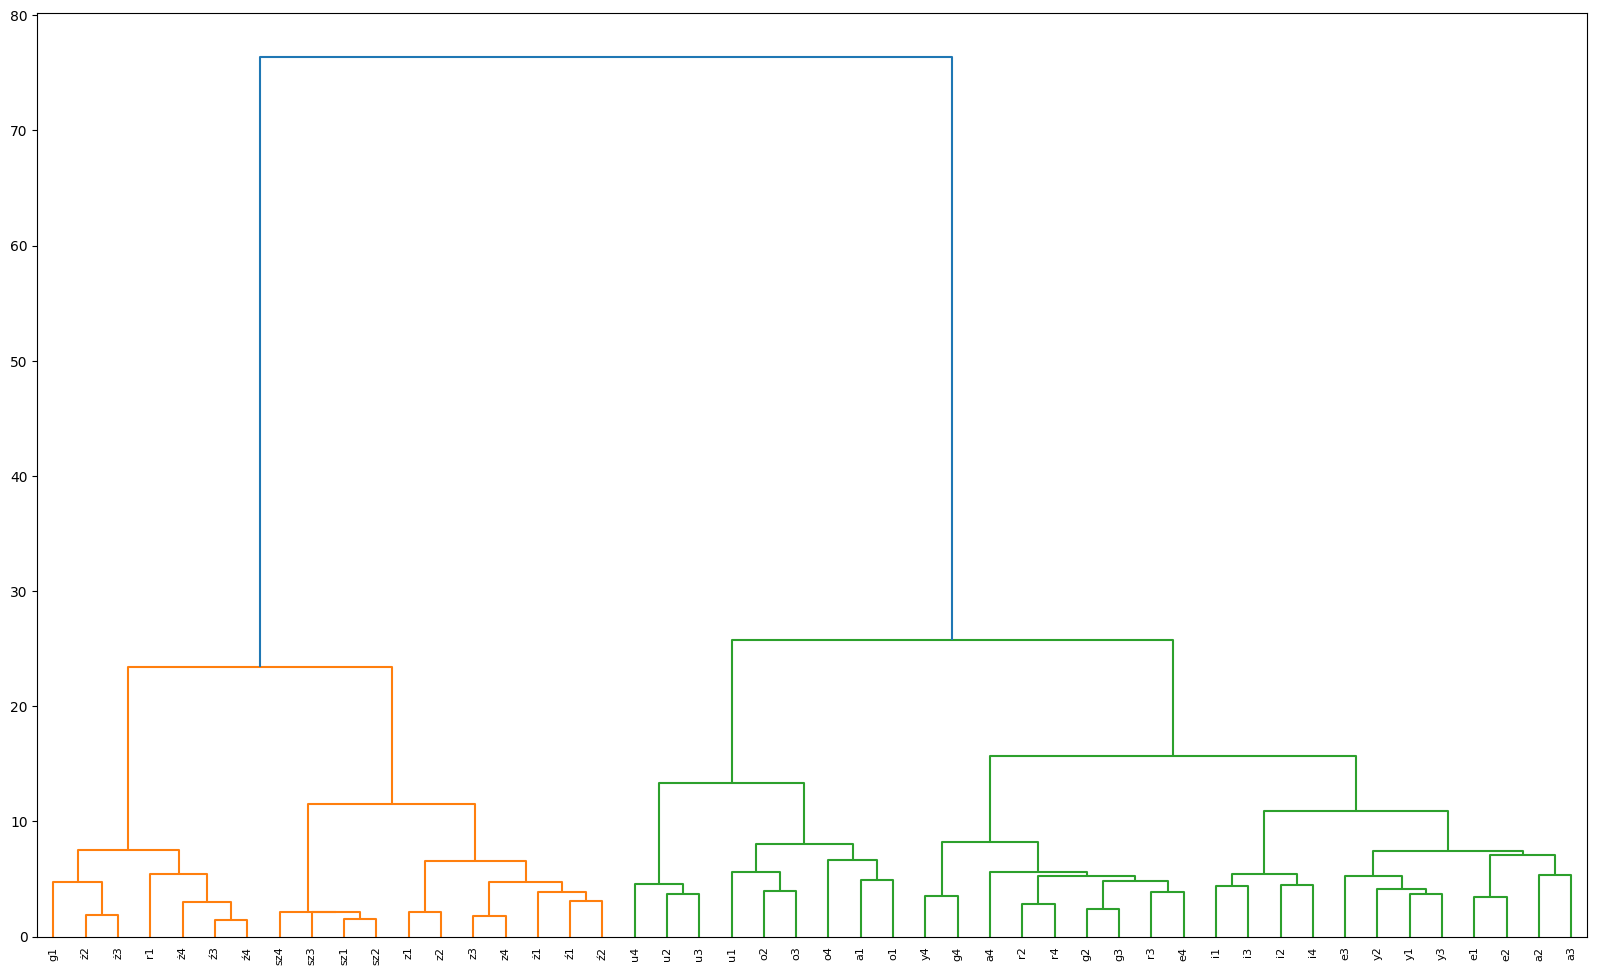

In [15]:
def plot_dendrogram(model, **kwargs):
    from scipy.cluster.hierarchy import dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(np.log10(X))
plt.figure(figsize=(20, 12))
plot_dendrogram(model, labels=labels)
plt.savefig('dendrogram_zadanie_6.png')

[0.47375508 0.31215928] 0.7859143587078741


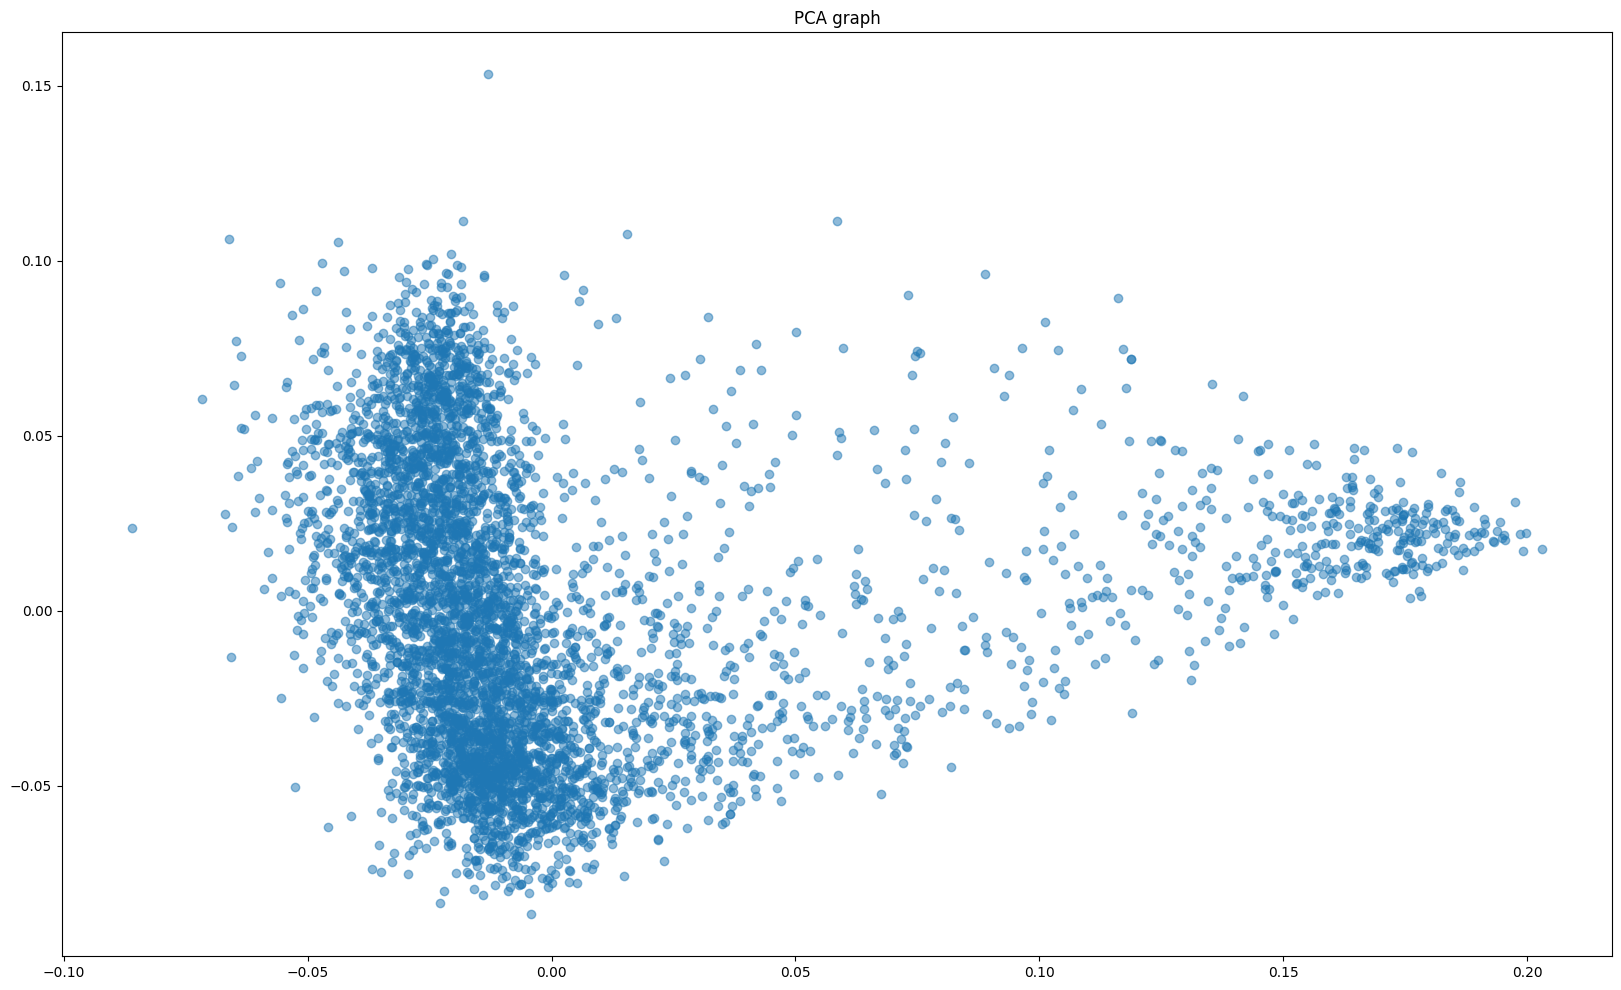

In [27]:
#X = np.genfromtxt('continuous-speech.txt', delimiter='\t')
X = np.genfromtxt('145325-cluster-contspeech.txt', delimiter='\t')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(20, 12))
plt.title('PCA graph')
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

plt.savefig('wykres_pca_zadanie_8.png')

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


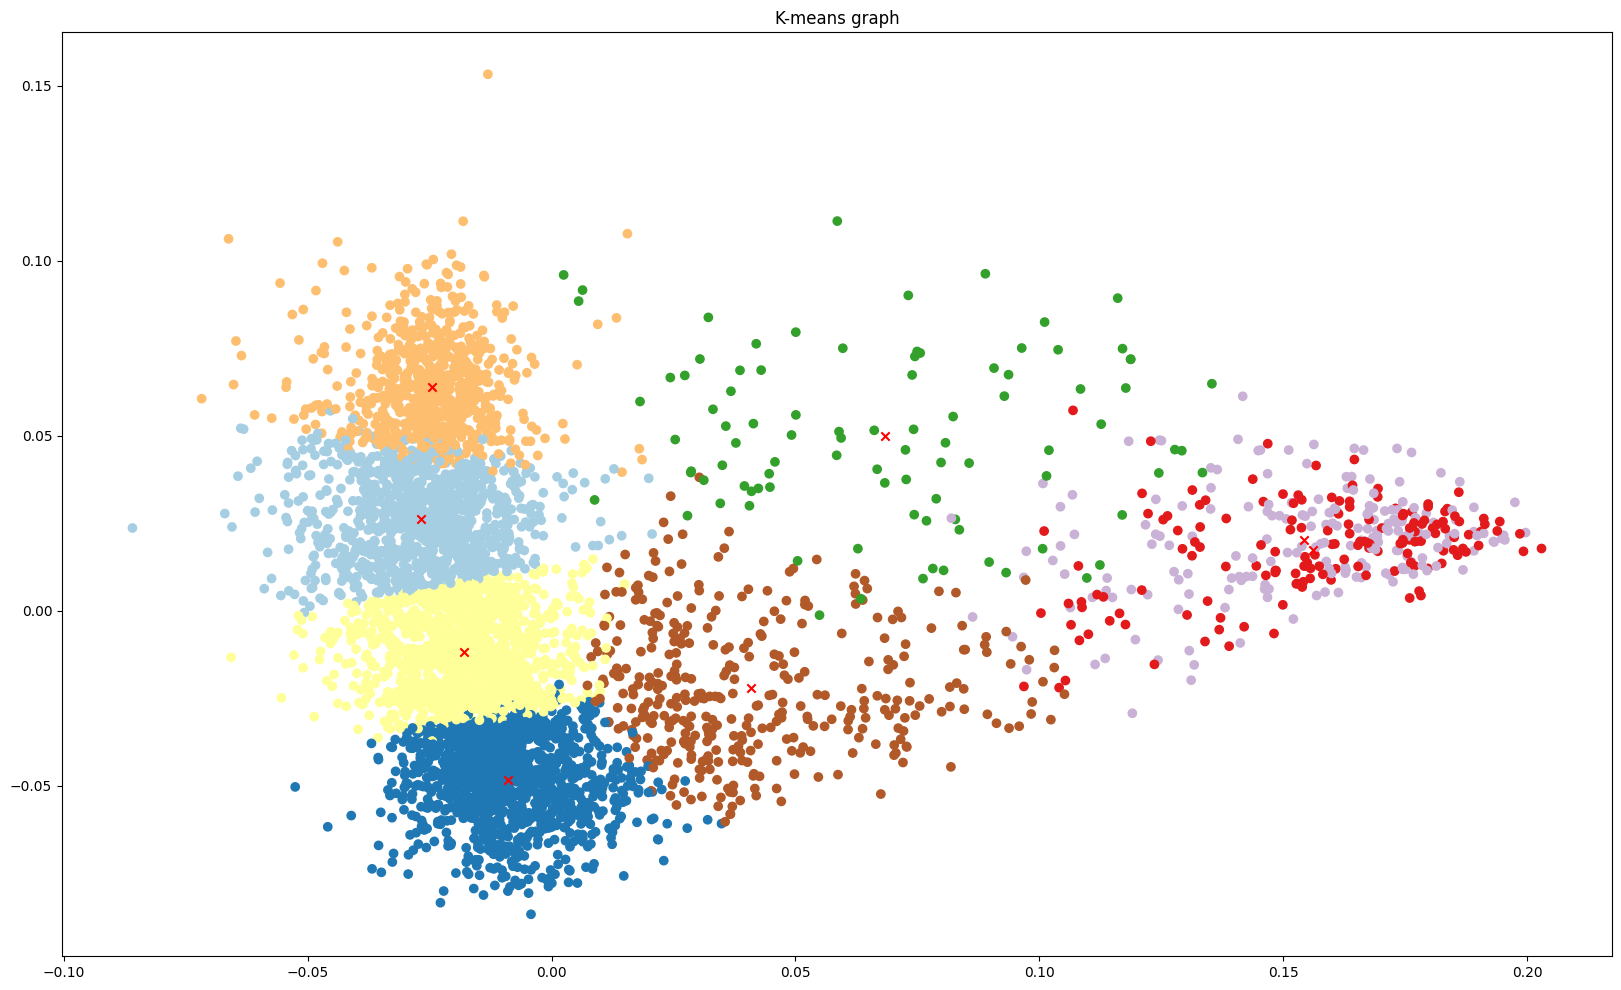

In [34]:
kmeans = KMeans()
kmeans.fit(X)
centroids = pca.transform(kmeans.cluster_centers_)

plt.subplots(figsize=(20,12))
plt.title('K-means graph')
plt.scatter(*X_pca.T, c=kmeans.predict(X), cmap='Paired')
plt.scatter(*centroids.T, marker='x', color='red')
plt.savefig('wykres_kmeans_zadanie_8.png')

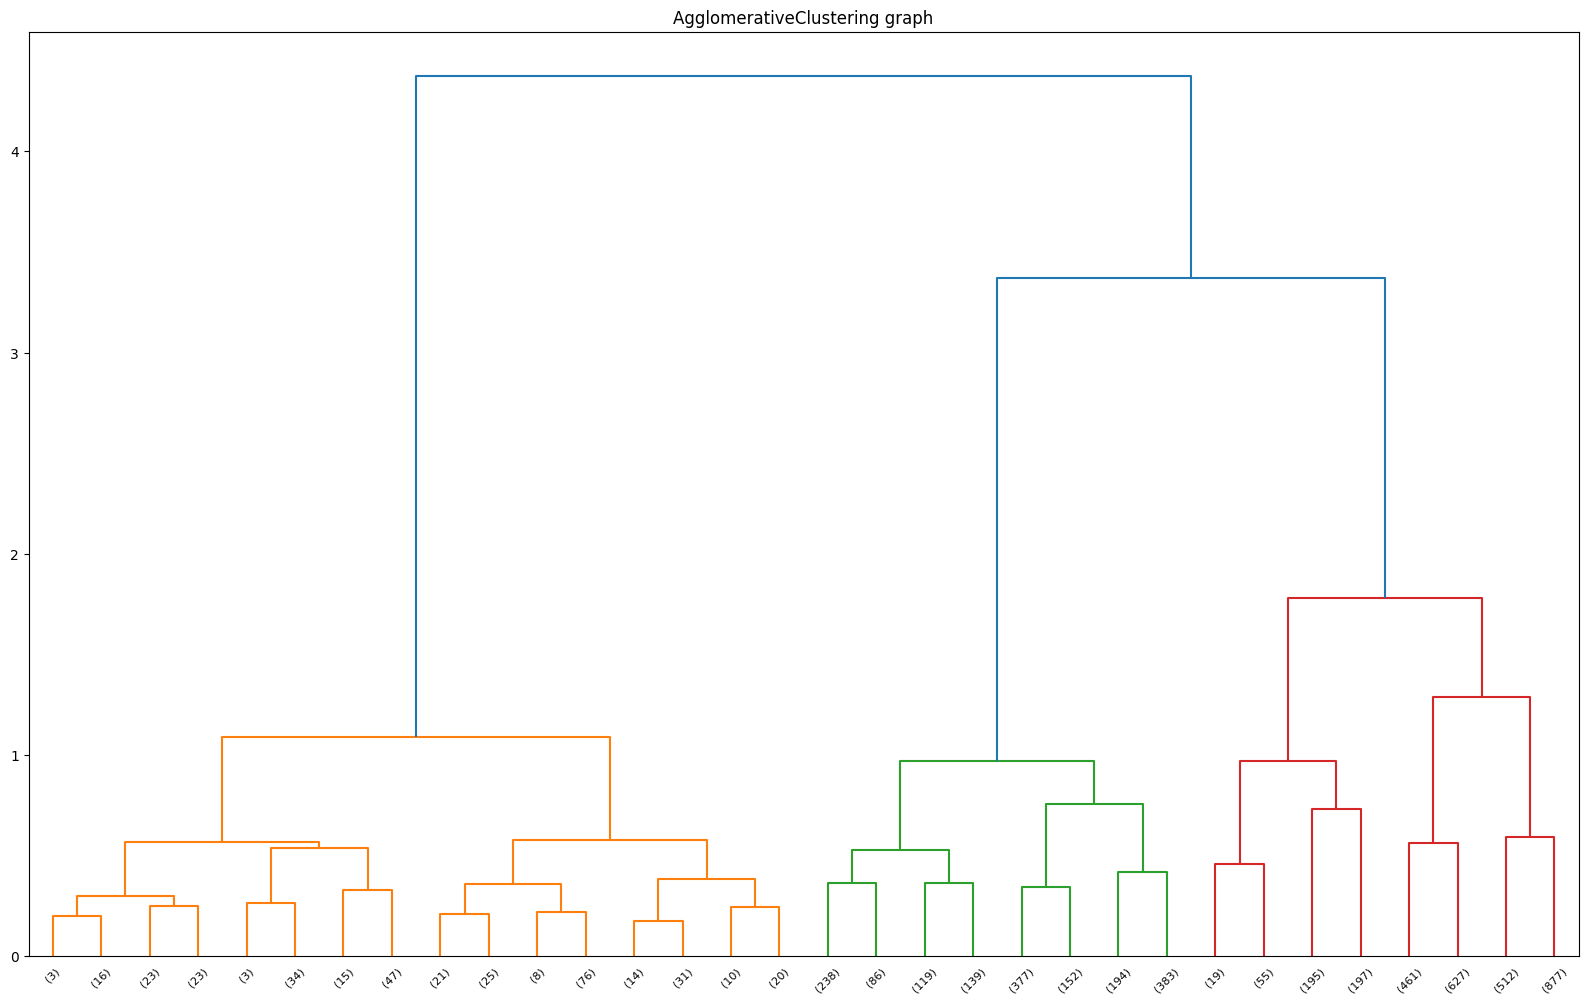

In [35]:
aclust = AgglomerativeClustering()
aclust = model.fit(X)
plt.subplots(figsize=(20,12))
plt.title('AgglomerativeClustering graph')
plot_dendrogram(aclust, truncate_mode='level', p=4)
plt.savefig('wykres_agglomerative_clustering_zadanie_8.png')

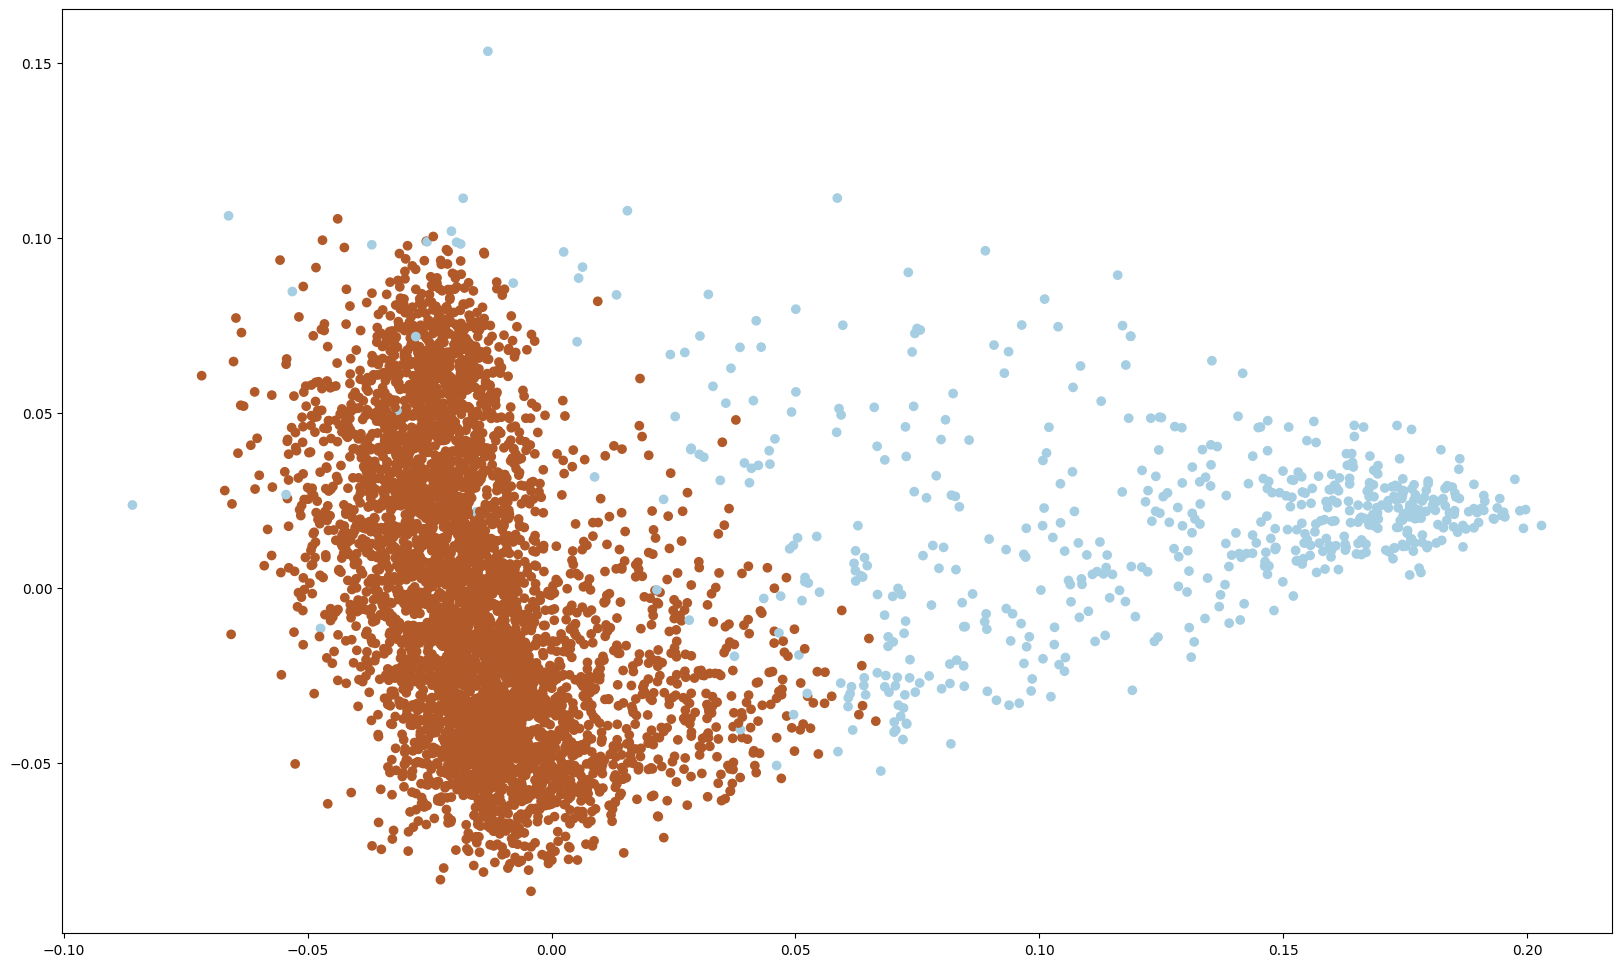

In [45]:
dbscan = DBSCAN(eps=0.05, min_samples=1000).fit(X)
plt.subplots(figsize=(20,12))
plt.scatter(*X_pca.T, c=dbscan.labels_, cmap='Paired')
plt.savefig('wykres_dbscan_zadanie_8.png')

[0.55283745 0.14639662] 0.6992340748853262


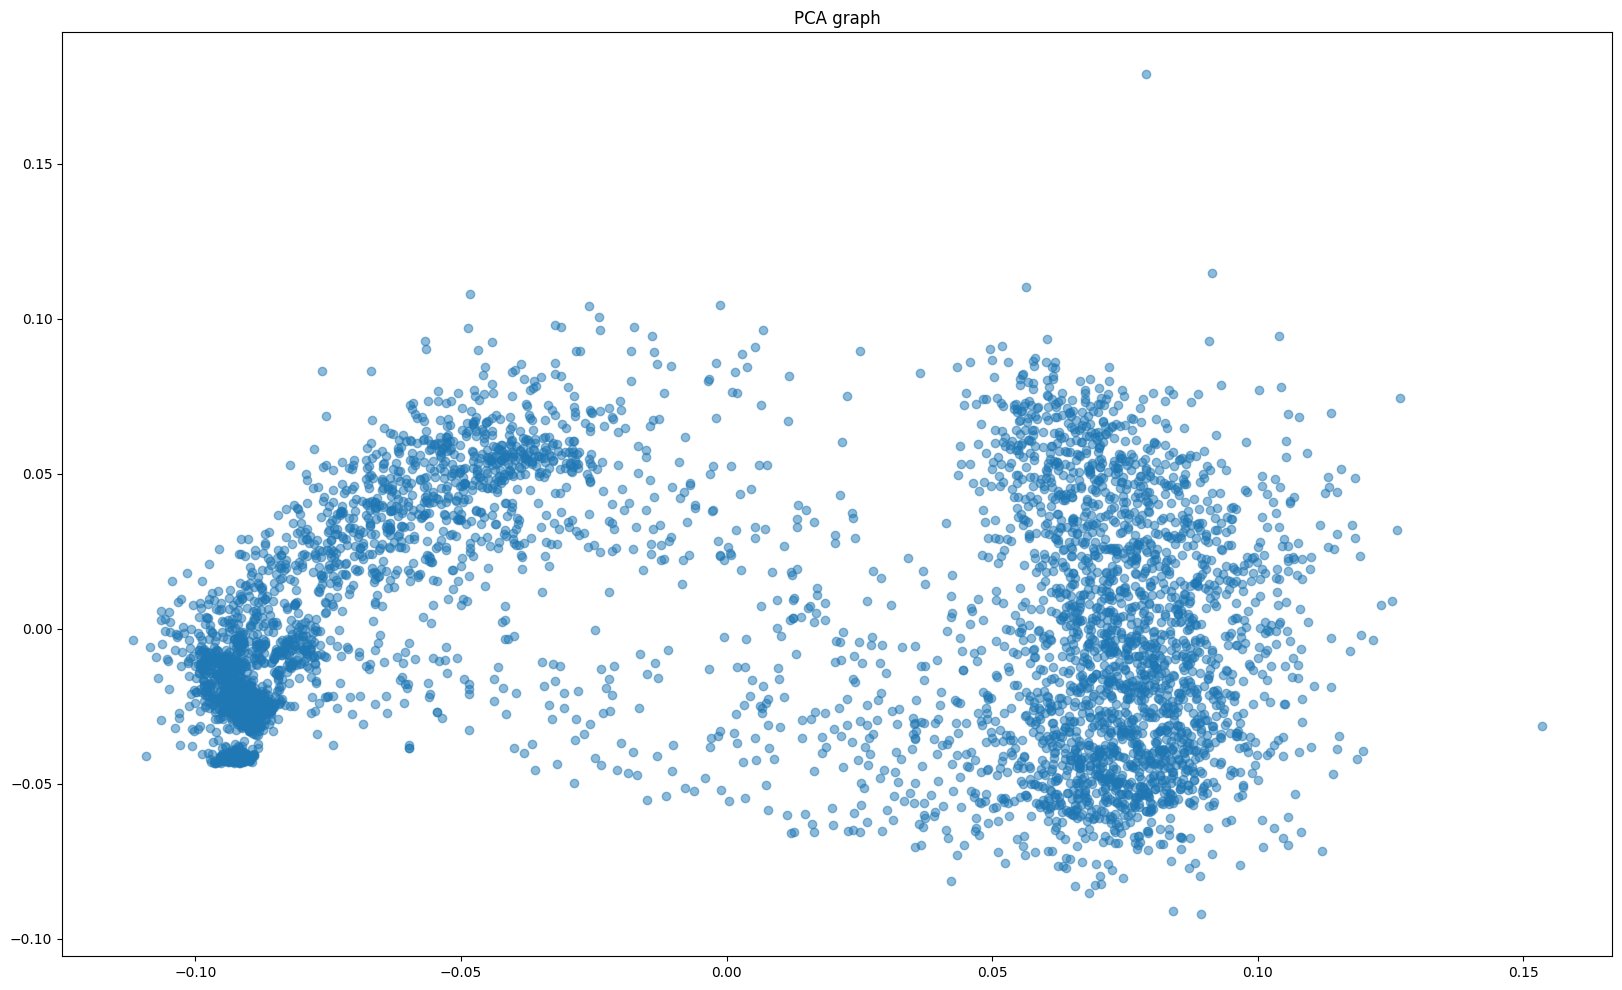

In [46]:
#X = np.genfromtxt('continuous-speech.txt', delimiter='\t')
X = np.genfromtxt('145325-cluster-contspeechviolin.txt', delimiter='\t')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(20, 12))
plt.title('PCA graph')
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

plt.savefig('wykres_pca_zadanie_9.png')

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


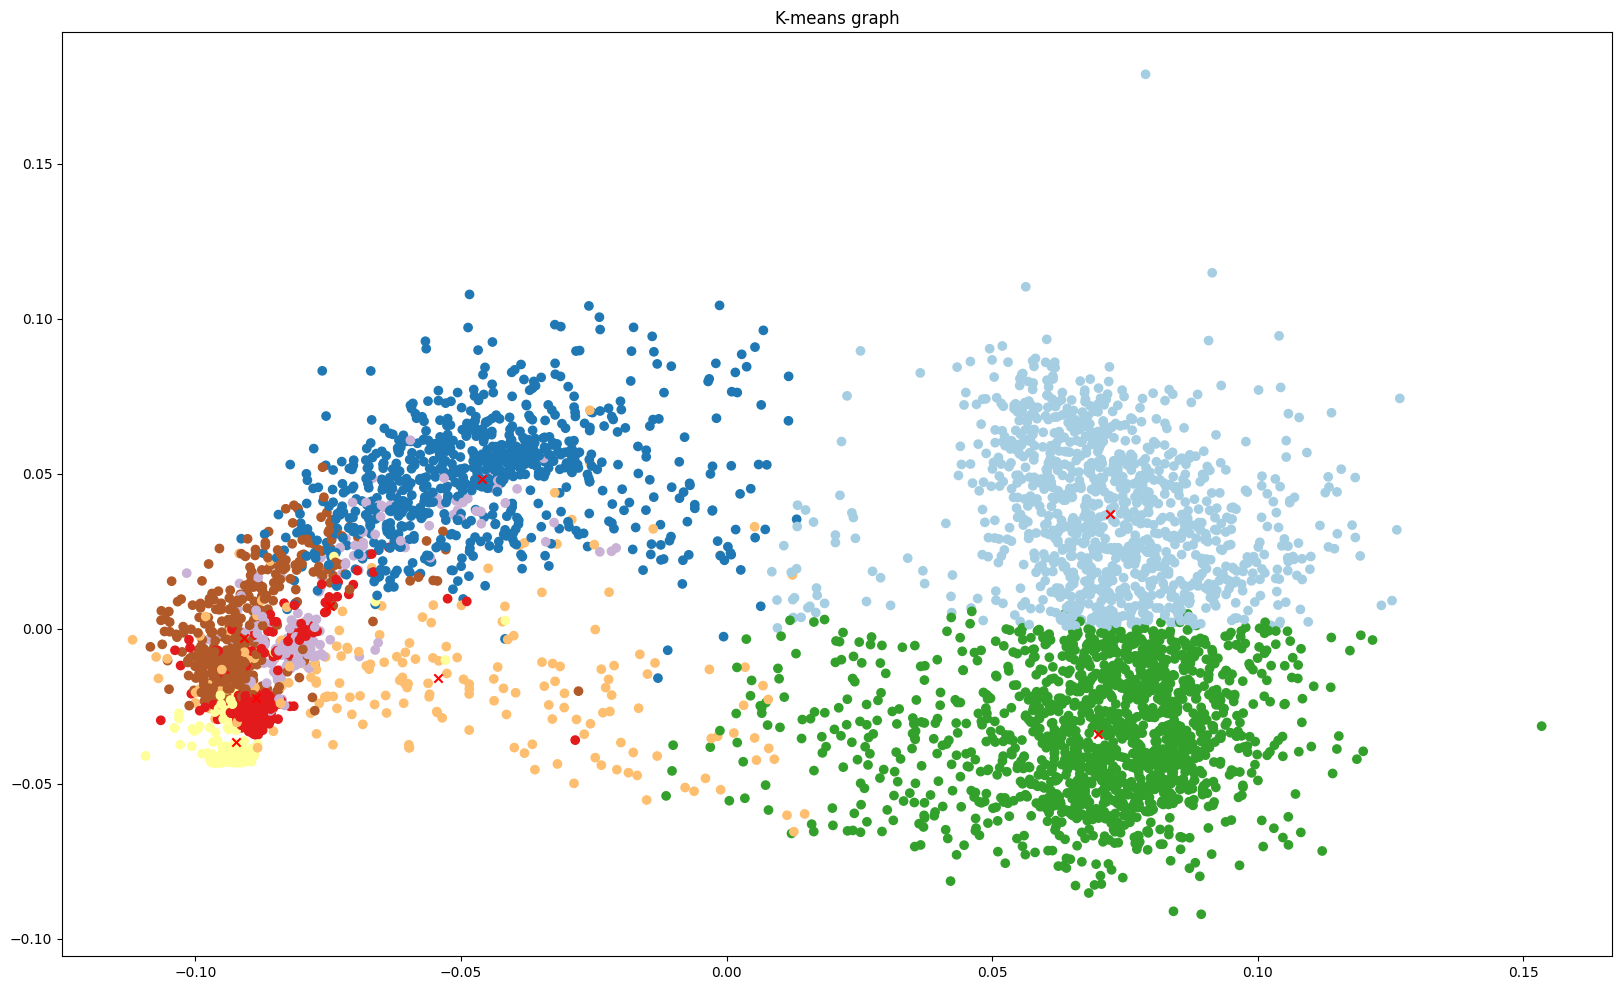

In [47]:
kmeans = KMeans()
kmeans.fit(X)
centroids = pca.transform(kmeans.cluster_centers_)

plt.subplots(figsize=(20,12))
plt.title('K-means graph')
plt.scatter(*X_pca.T, c=kmeans.predict(X), cmap='Paired')
plt.scatter(*centroids.T, marker='x', color='red')
plt.savefig('wykres_kmeans_zadanie_9.png')

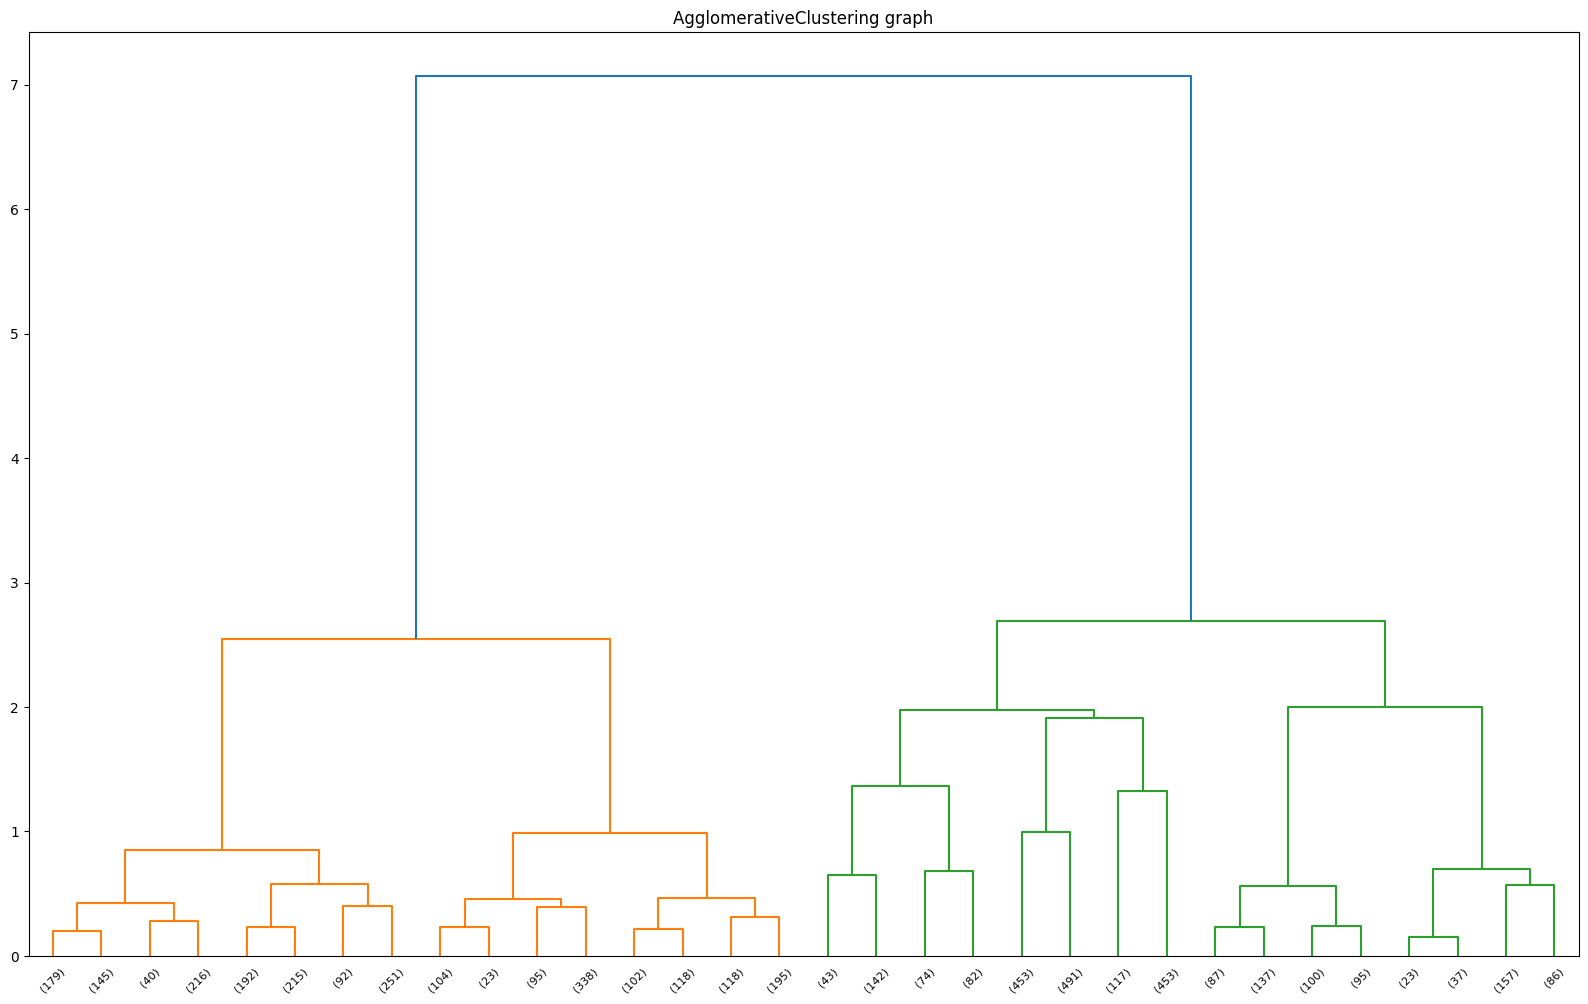

In [48]:
aclust = AgglomerativeClustering()
aclust = model.fit(X)
plt.subplots(figsize=(20,12))
plt.title('AgglomerativeClustering graph')
plot_dendrogram(aclust, truncate_mode='level', p=4)
plt.savefig('wykres_agglomerative_clustering_zadanie_9.png')

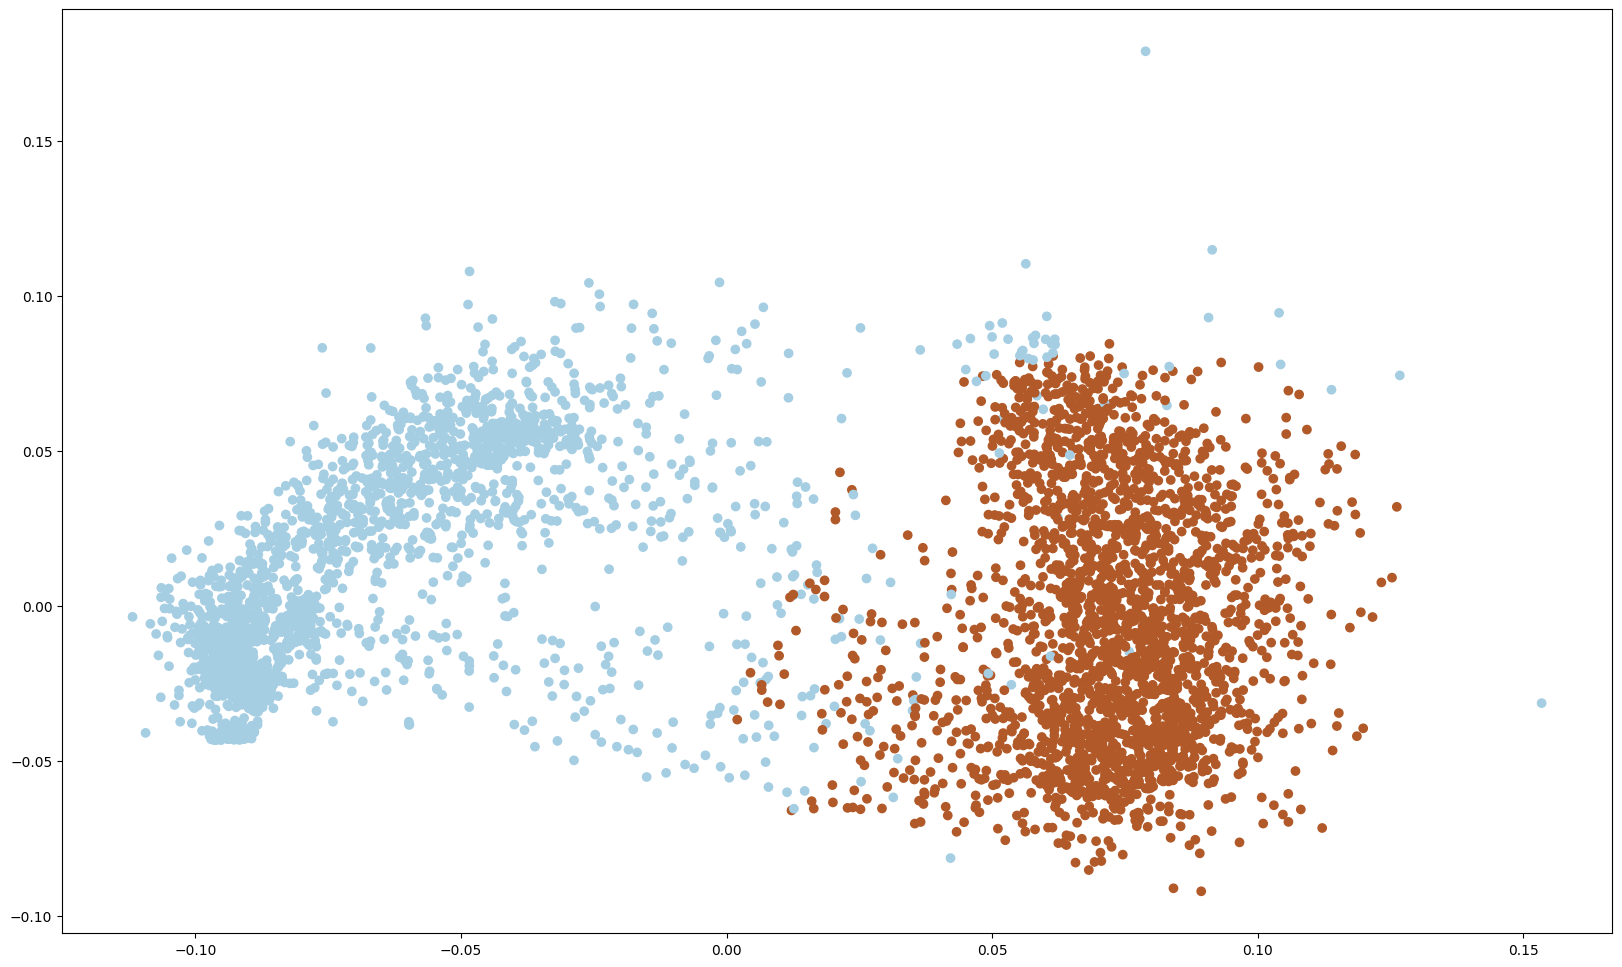

In [53]:
dbscan = DBSCAN(eps=0.05, min_samples=1000).fit(X)
plt.subplots(figsize=(20,12))
plt.scatter(*X_pca.T, c=dbscan.labels_, cmap='Paired')
plt.savefig('wykres_dbscan_zadanie_9.png')